In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import pandas as pd
os.chdir(r"C:\Users\Pranjali\Downloads")


In [2]:
rural = gpd.read_file(r"C:\Users\Pranjali\Downloads\2011_rural")

In [13]:
list(rural.columns.values)

['Unnamed_ 0',
 'Unnamed__1',
 'Unnamed__2',
 'DISTRICT',
 'Tothhold',
 'saljob',
 'pcsaljob',
 'govtsal',
 'pcgovtsal',
 'publicsal',
 'pcpublicsa',
 'salaryjob',
 'pcsalaryjo',
 'ninctax',
 'hholdgov',
 'incl5k',
 'pcincl5k',
 'incg5k10k',
 'pcincg5k10',
 'incg10k',
 'pcincg10k',
 'TP',
 'M_hhold',
 'F_hhold',
 'Tribalgrp',
 'PCTrgrp',
 'infants',
 'tribal_pop',
 'tot_worker',
 'main_work',
 'marg_work',
 'non_work',
 'non_workm',
 'agri_work',
 'hosp',
 'unirr_area',
 'irr_area',
 'geometry']

In [14]:
corrected = pd.read_excel( r"C:\Users\Pranjali\Downloads\GUJARAT ALL DATA\corrected2.xlsx")
rural['TP']=corrected['pop']
rural['unirr_area']=corrected['unirr']
rural['irr_area']=corrected['irr']

In [15]:
#SENSITIVITY INDICATORS
#1.Total population
popln = []
pindex = []
for i in range(1,26):
    popln.append(rural['TP'][i])
for i in range(25):
    index = (popln[i]-min(popln))/(max(popln)-min(popln))
    pindex.append(index)

In [16]:
#2.tribal population
scst = []
scstindex = []
for i in range(1,26):
    scst.append((rural['tribal_pop'][i]))
for i in range(25):
    index = (scst[i]-min(scst))/(max(scst)-min(scst))
    scstindex.append(index)

In [17]:
#3.infants population
infants = []
infindex = []
for i in range(1,26):
    infants.append((rural['infants'][i]))
for i in range(25):
    index = (infants[i]-min(infants))/(max(infants)-min(infants))
    infindex.append(index)

In [18]:
TPindex =[]
for i in range(25):
    TPindex.append(((scst[i]+infants[i])/popln[i])*pindex[i] + (0.5-(scst[i]/popln[i]))*scstindex[i]+ (0.5-(infants[i]/popln[i]))*infindex[i])
TPindex   

[0.3425082286285567,
 0.8043365997341729,
 0.19561089083302557,
 0.264665012765217,
 0.6524885025042015,
 0.13384492630932432,
 0.26438256230571305,
 0.2550529132861464,
 0.3353727844271167,
 0.2341729771869845,
 0.009564190643758774,
 0.3709010617733618,
 0.18224837953374187,
 0.32206799046419843,
 0.2395466955443768,
 0.3099552607836946,
 0.6732255836722691,
 0.6356077702743946,
 0.7540391513396162,
 0.055874814229119635,
 0.3263437539005783,
 -0.04905808970813097,
 0.23797042528052267,
 0.3590996563126893,
 0.544003976338755]

In [19]:
#4.Unirrigated area
unirra = []
unirrindex = []
for i in range(1,26):
    unirra.append((rural['unirr_area'][i]))
for i in range(25):
    index = (unirra[i]-min(unirra))/(max(unirra)-min(unirra))
    unirrindex.append(index)

In [20]:
#5.Non-workers
nwork = []
nworkindex = []
for i in range(1,26):
    nwork.append((rural['non_work'][i]))
for i in range(25):
    index = (nwork[i]-min(nwork))/(max(nwork)-min(nwork))
    nworkindex.append(index)

In [21]:
#6.pop.with income<5000
incl5 = []
incl5index = []
for i in range(1,26):
    incl5.append((rural['incl5k'][i]))
for i in range(25):
    index = (incl5[i]-min(incl5))/(max(incl5)-min(incl5))
    incl5index.append(index)

In [22]:
#Sensitivity index
S=[0]
for i in range(25):
    S.append(0.25*(TPindex[i]+unirrindex[i]+nworkindex[i]+incl5index[i]))

In [23]:
#Adaptive capacity indicators
#1.households registered with govt.
hholdg = []
hholdgindex = []
for i in range(1,26):
    hholdg.append((rural['hholdgov'][i]))
for i in range(25):
    index = (hholdg[i]-min(hholdg))/(max(hholdg)-min(hholdg))
    hholdgindex.append(index)

In [24]:
rural['hholdwater']=[0,63.94,47.69,62.66,74.26,47.8,70.13,59.88,49.35,67.23,53.46,48.95,54.71,61.08,56.51,59.74,42.02,21.01,10.88,41.61,27.8,51.85,9.89,88.34,86.71,44.35]

In [25]:
#2.households with water
hholdw = []
hholdwindex = []
for i in range(1,26):
    hholdw.append((rural['hholdwater'][i]))
for i in range(25):
    index = (hholdw[i]-min(hholdw))/(max(hholdw)-min(hholdw))
    hholdwindex.append(index)

In [26]:
hholdindex = []
for i in range(25):
    hholdindex.append(0.5*(hholdgindex[i]+hholdwindex[i]))

In [27]:
#3.Irrigated area
irra = []
irrindex = []
for i in range(1,26):
    irra.append((rural['irr_area'][i]))
for i in range(25):
    index = (irra[i]-min(irra))/(max(irra)-min(irra))
    irrindex.append(index)

In [28]:
# Agriculture workers
agworker =[]
agworkindex=[]
for i in range(1,26):
    agworker.append((rural['agri_work'][i]))
for i in range(25):
    index = (agworker[i]-min(agworker))/(max(agworker)-min(agworker))
    agworkindex.append(index)

In [29]:
agriindex=[]
for i in range(25):
    agriindex.append(0.5*(irrindex[i]+agworkindex[i]))

In [30]:
#4.pop.with income>10000
incg10 = []
incg10index = []
for i in range(1,26):
    incg10.append((rural['incg10k'][i]))
for i in range(25):
    index = (incg10[i]-min(incg10))/(max(incg10)-min(incg10))
    incg10index.append(index)

In [31]:
#5.main workers
aworker =[]
aworkindex=[]
for i in range(1,26):
    aworker.append((rural['main_work'][i]))
for i in range(25):
    index = (aworker[i]-min(aworker))/(max(aworker)-min(aworker))
    aworkindex.append(index)

In [32]:
#6.marginal workers
mworker =[]
mworkindex=[]
for i in range(1,26):
    mworker.append((rural['marg_work'][i]))
for i in range(25):
    index = (mworker[i]-min(mworker))/(max(mworker)-min(mworker))
    mworkindex.append(index)

In [33]:
workindex=[]
for i in range(25):
    if(aworker[i]>=mworker[i]):
        workindex.append(0.33*0.25*((aworker[i]/(aworker[i]+mworker[i]))*aworkindex[i]+(mworker[i]/(aworker[i]+mworker[i]))*mworkindex[i]))
    else:
        workindex.append(0.33*0.25*((mworker[i]/(aworker[i]+mworker[i]))*aworkindex[i]+(aworker[i]/(aworker[i]+mworker[i]))*mworkindex[i]))

In [34]:
A=[0]
for i in range(25):
    A.append(0.25*(hholdindex[i]+agriindex[i]+incg10index[i]+workindex[i]))
len(A)

26

In [25]:
import pandas as pd
exposure = pd.read_excel( r"C:\Users\Pranjali\Downloads\Exposure.xlsx")
E = exposure['exposure']


In [34]:
V=[]
for i in range(26):
    V.append(0.33*(E[i]-A[i]+S[i]))
for i in range(25):
    if(V[i]<0):
        V[i]=0


In [35]:
import pandas as pd
expo = pd.read_excel(r"D:\All project data\2011-rlindex(100to30)-GJ.xlsx")
E2=0.25*(expo['r1index']+expo['r2index']+expo['r3index']+expo['r5index'])

In [36]:
E21=[0]
for i in range(25):
    E21.append(E2[i])

In [37]:
expo1=pd.read_excel( r"D:\All project data\difference-expo2011-fut-guj.xlsx")
E3=0.33*0.25*(expo1['r1index']+expo1['r2index']+expo1['r3index']+expo1['r5index'])

In [38]:
E31=[0]
for i in range(25):
    E31.append(E3[i])

In [39]:
v1=[]
for i in range(26):
    v1.append(0.33*(E21[i]-A[i]+S[i]))
for i in range(25):
    if(v1[i]<0):
        v1[i]=0

In [40]:
v2=[]
for i in range(26):
    v2.append(0.33*(E31[i]))
for i in range(25):
    if(v2[i]<0):
        v2[i]=0

In [41]:
ex=pd.read_excel( r"D:\All project data\futuremodels(100to30)-rl-guj.xlsx")
E5=0.25*(ex['r1index']+ex['r2index']+ex['r3index']+ex['r5index'])

In [42]:
E51=[0]
for i in range(25):
    E51.append(E5[i])

In [43]:
vfut1=[]
for i in range(26):
    vfut1.append(0.33*(E51[i]-A[i]+S[i]))

In [53]:
ex=pd.read_excel( r"D:\All project data\models-2006-2036(100to30)-rlindex-gj.xlsx")
E4=0.25*(ex['r1index']+ex['r2index']+ex['r3index']+ex['r5index'])

In [54]:
E41=[0]
for i in range(25):
    E41.append(E4[i])

In [55]:
vfut=[]
for i in range(26):
    vfut.append(0.33*(E41[i]-A[i]+S[i]))

In [77]:
max(vfut)

0.397096480085814

In [47]:
import pandas as pd
tdata=pd.read_excel(r"D:\All project data\GUJ-TDIFF_INDEX_ALLmodels.xlsx")

In [48]:
t1 = tdata['tdiffavg']
t=[0]
for i in range(25):
    t.append(t1[i])

In [71]:
rdiff = pd.read_excel(r"C:\Users\Pranjali\Downloads\Absdiff_returnlevels_guj.xlsx")

In [73]:
len(rdiff['d1'])

25

In [49]:
rural['RL100']=expo['rl100']
rural['RL30']=expo['r30']
rural['return1index']=expo['r1index']
rural['return2index']=expo['r2index']
rural['return3index']=expo['r3index']
rural['return5index']=expo['r5index']
rural['Sindex']= S
rural['Aindex']= A
rural['Eindex1']=E21
rural['V2011']=v1
#rural['Eindex2']=E31
#rural.to_file(driver = 'ESRI Shapefile', filename= r"C:\Users\Pranjali\Downloads\rural2011.shp")

In [166]:
rural['rdiff13']=0

In [167]:
rural['rdiff13'][1:]=rdiff['d13']

C:\Users\Pranjali\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [56]:
rural['Vfut1']=vfut
rural['Efut1']=E41

In [51]:
rural['Efutlong']=E51
rural['vlong']=vfut1

In [52]:
rural['tdiffavgind']= t

In [57]:
rural.to_file(driver = 'ESRI Shapefile', filename= r"C:\Users\Pranjali\Downloads\ruralguj2011.shp")

In [208]:
rural3 = rural[['DISTRICT','rdiff13']]
data_for_map = rural3.rename(index=str, columns={'DISTRICT':'dist','rdiff13':'expo'})
merged = rural.set_index('DISTRICT').join(data_for_map.set_index('dist'))

In [169]:
max(rdiff['d13'])

24.16337441304793

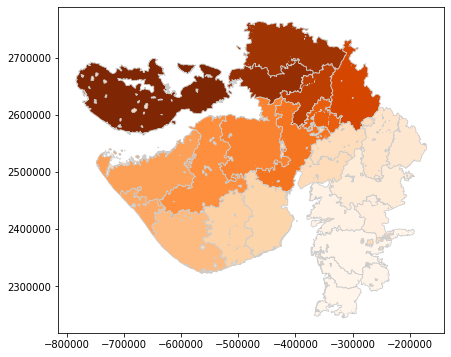

In [216]:
variable = 'rdiff13'
# set the range for the choropleth

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
merged.plot(column=variable, cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8')


In [172]:
ax.axis('off')
# add a title
ax.set_title('Difference in 1 day maximum 30 year return level ', fontdict={'fontsize': '18', 'fontweight' : '3'})
# create an annotation for the data source
cax = fig.add_axes([0.14, 0.1, 0.7, 0.01])
sm4 = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=-6, vmax=25))
# empty array for the data range
sm4._A = []
# add the colorbar to the figur
cbar = fig.colorbar(sm4,cax= cax,orientation ='horizontal')
#saving our map as .png file.
fig.savefig(r'C:\Users\Pranjali\Downloads\R13diffguj.png', dpi=300)

In [58]:
rural2 = rural[['DISTRICT','Efut1']]
data_for_map = rural2.rename(index=str, columns={'DISTRICT':'dist','Efut1':'E'})
merged = rural.set_index('DISTRICT').join(data_for_map.set_index('dist'))

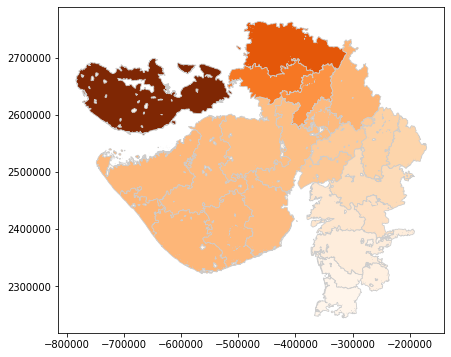

In [59]:
variable = 'Efut1'
# set the range for the choropleth

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
merged.plot(column=variable, cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8')

In [59]:
max(A)

0.633889620185057

In [80]:
ax.axis('off')
# add a title
ax.set_title('Future Exposure', fontdict={'fontsize': '18', 'fontweight' : '3'})
# create an annotation for the data source
cax = fig.add_axes([0.14, 0.1, 0.7, 0.01])
sm4 = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=0, vmax=1))
# empty array for the data range
sm4._A = []
# add the colorbar to the figur
cbar = fig.colorbar(sm4,cax= cax,orientation ='horizontal')
#saving our map as .png file.
fig.savefig(r'C:\Users\Pranjali\Downloads\E-2006-36(100to30)-guj.png', dpi=300)

In [179]:
rural1 = rural[['DISTRICT','Vfutshort1']]
data_for_map = rural1.rename(index=str, columns={'DISTRICT':'dist','Vfutshort1':'vuln'})
merged = rural.set_index('DISTRICT').join(data_for_map.set_index('dist'))

KeyError: "['Vfutshort1'] not in index"

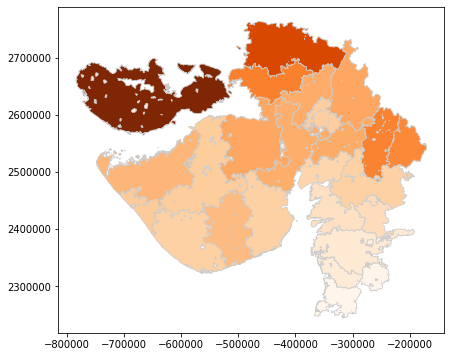

In [82]:
variable = 'Vfutshort1'
# set the range for the choropleth

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
merged.plot(column=variable, cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8')

In [83]:
ax.axis('off')
# add a title
ax.set_title('Future Vulnerability', fontdict={'fontsize': '18', 'fontweight' : '3'})
# create an annotation for the data source
cax = fig.add_axes([0.14, 0.1, 0.7, 0.01])
sm4 = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=0, vmax=0.40))
# empty array for the data range
sm4._A = []
# add the colorbar to the figur
cbar = fig.colorbar(sm4,cax= cax,orientation ='horizontal')
#saving our map as .png file.
fig.savefig(r'C:\Users\Pranjali\Downloads\fut-2006-36-gj-vindex(100to30).png', dpi=300)

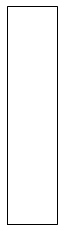

In [173]:
from cartopy.io import shapereader
import numpy as np
import geopandas
import matplotlib.pyplot as plt

import cartopy.crs as ccrs


# get country borders
resolution = '10m'
category = 'cultural'
name = 'admin_0_countries'

shpfilename = shapereader.natural_earth(resolution, category, name)

# read the shapefile using geopandas
df = geopandas.read_file(r"C:\Users\Pranjali\Downloads\ne_10m_admin_0_countries.shp")

# read the german borders
poly = df.loc[df['ADMIN'] == 'India']['geometry'].values[0]

ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_geometries(poly, crs=ccrs.PlateCarree(), facecolor='none', 
                  edgecolor='0.5')

ax.set_extent([67,79, 98, 38], crs=ccrs.PlateCarree())

In [83]:
df = geopandas.read_file(r"C:\Users\Pranjali\Downloads\ne_10m_admin_0_countries.shp")

In [191]:
df = df[['ADMIN','geometry']]

In [192]:
df= df[df['ADMIN']=='India']

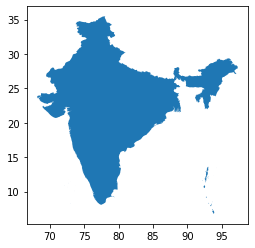

In [196]:
df.plot()

In [181]:
rural4 = rural[['geometry','rdiff1']]

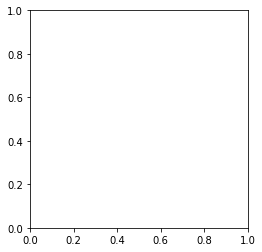

In [197]:
country_peripheries = geopandas.overlay(df,rural4)
country_peripheries.plot(alpha=0.5, edgecolor='k', cmap='tab10')